In [1]:
# Importing the modules

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS


In [2]:
# Configuration options

num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 2.0
min_samples = 22
cluster_method = 'xi'
metric = 'minkowski'

Metric to use for distance computation. Any metric from scikit-learn or scipy.spatial.distance can be used.

If metric is a callable function, it is called on each pair of instances (rows) and the resulting value recorded.
The callable should take two arrays as input and return one value indicating the distance between them. 

In [3]:
# Generating the data

X, y = make_blobs(n_samples = num_samples_total,
                  centers = cluster_centers,
                  n_features = num_classes,
                  center_box=(0, 1),
                  cluster_std = 0.5)


In [4]:
# Computing the OPTICS

db = OPTICS(max_eps=epsilon, min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(X)
labels = db.labels_


no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)


print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 57


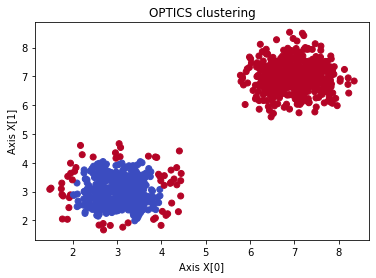

In [5]:
# Generate scatter plot for training data

colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title(f'OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

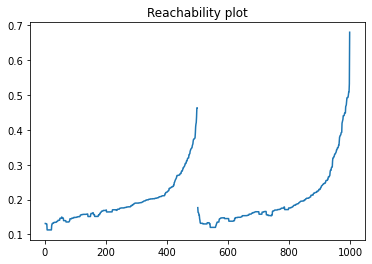

In [6]:
# Generate reachability plot

reachability = db.reachability_[db.ordering_]

plt.plot(reachability)
plt.title('Reachability plot')
plt.show()